## Hook's law on a Dual Spring Coil

<img src="https://raw.githubusercontent.com/bernardocarvalho/python-basics/main/data-files/20150907_094839.jpg" width="400" />

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv
from scipy.optimize import curve_fit
# %matplotlib notebook
%matplotlib inline

In [2]:
#filename = 'data-files/dados_start.csv'
filename = 'https://raw.githubusercontent.com/bernardocarvalho/python-basics/main/data-files/dados_start.csv'
data = read_csv(filename, sep=';')

In [3]:
# X exp. values (Displacement)
dispRaw = data['Displ(um)'].values / 1e3
# Y exp. values (Force)
forceRaw = data['Force(mN)'].values / 1e3

# Plot Experimental Data

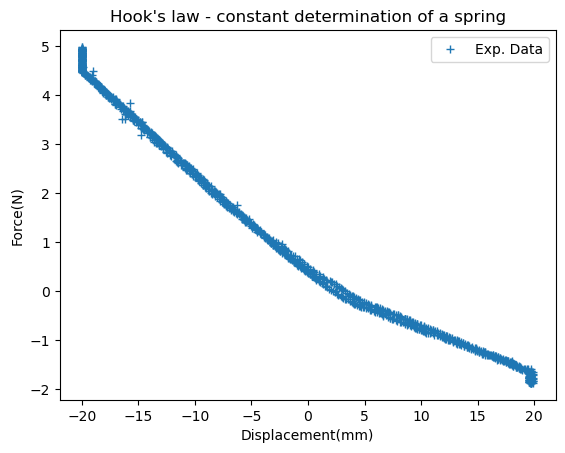

In [4]:
plt.figure()
plt.plot(dispRaw, forceRaw, '+', label='Exp. Data')
#plt.annotate('example text', xy=(0.5, -0.75))
plt.xlabel("Displacement(mm)")
plt.ylabel("Force(N)")
plt.title("Hook's law - constant determination of a spring")
plt.legend()
plt.show()

### Simple Linear Fitting 

In [5]:
# Define Simple Linear Fit Function
def fLinear(dsp, b, m):
    fit_Force = m * dsp + b
    return fit_Force

In [6]:
print(f'Total number of points = {dispRaw.size:d}')
"""
# Select here data points
firstPoint = 0
endPoint = disp.size-1
disp  = dispRaw[firstPoint:endPoint]
force = forceRaw[firstPoint:endPoint]
"""
Dmax = 19
disp0  = dispRaw[dispRaw < Dmax]
force0  = forceRaw[dispRaw < Dmax]
Dmin = -19
disp  = disp0[disp0 > Dmin]
force  = force0[disp0 > Dmin]

popt, pcov = curve_fit(fLinear, disp, force)
perr = np.sqrt(np.diag(pcov))
fitted_force = fLinear(disp, *popt)
rmse = np.sqrt(
    np.sum((force - fitted_force) ** 2) )
print(f'B = {popt[0]:.2g} N, M = {popt[1]:.3g} N / mm')

Total number of points = 1000
B = 0.84 N, M = -0.157 N / mm


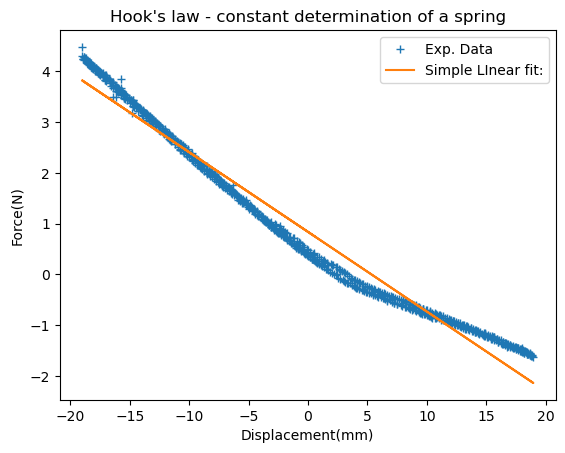

In [7]:
plt.figure()
plt.plot(disp, force, '+', label='Exp. Data')
plt.plot(disp, fitted_force, label='Simple LInear fit:')
#plt.plot(x, y2, '.', label='$\sin^{2}$')
#plt.plot(x, y3, linewidth=3)
#plt.annotate('example text', xy=(0.5, -0.75))
plt.xlabel("Displacement(mm)")
plt.ylabel("Force(N)")
plt.title("Hook's law - constant determination of a spring")
plt.legend()
plt.show()

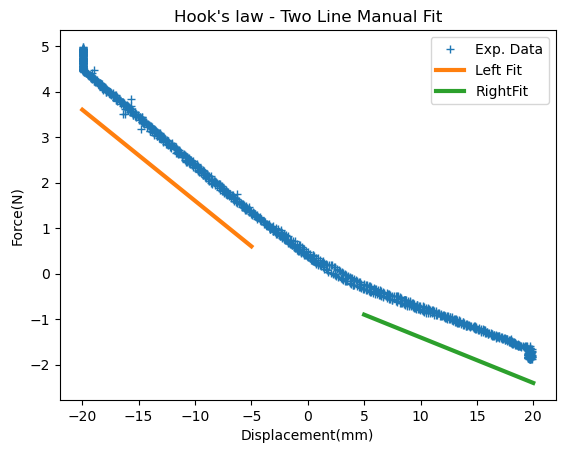

In [8]:
# Define Simple Linear Fit Function
def fLine(x, m, b):
    return m * x + b

plt.figure()
plt.plot(dispRaw, forceRaw, '+', label='Exp. Data')
x=np.linspace(-20,-5,20)
plt.plot(x, fLine(x, -0.2,-0.4), linewidth=3, label='Left Fit')
x=np.linspace(5,20,20)
plt.plot(x, fLine(x, -0.1,-0.4), linewidth=3, label='RightFit')
#plt.annotate('example text', xy=(0.5, -0.75))
plt.xlabel("Displacement(mm)")
plt.ylabel("Force(N)")
plt.title("Hook's law - Two Line Manual Fit")
plt.legend()
plt.show()

### Piecewise Linear Fitting 

In [9]:
# Piecewise Linear Fit Function writen with Numpy
# See https://stackoverflow.com/questions/29382903/how-to-apply-piecewise-linear-fit-in-python
def piecewise_linear(x, x0, y0, k1, k2):
    return np.piecewise(x, [x < x0], [lambda x:k1*x + y0-k1*x0, lambda x:k2*x + y0-k2*x0])

In [10]:
popt, pcov = curve_fit(piecewise_linear, disp, force)
perr = np.sqrt(np.diag(pcov))
fitted_force = piecewise_linear(disp, *popt)
rmse = np.sqrt(np.sum((force - fitted_force) ** 2) )
print(f'x0 = {popt[0]:.2g} mm, y0 = {popt[1]:.2g} N ')
print(f'k1 = {popt[2]:.2g} mm / N, k2 = {popt[3]:.2g} mm/ N ')

x0 = 1.1 mm, y0 = 0.13 N 
k1 = -0.21 mm / N, k2 = -0.096 mm/ N 


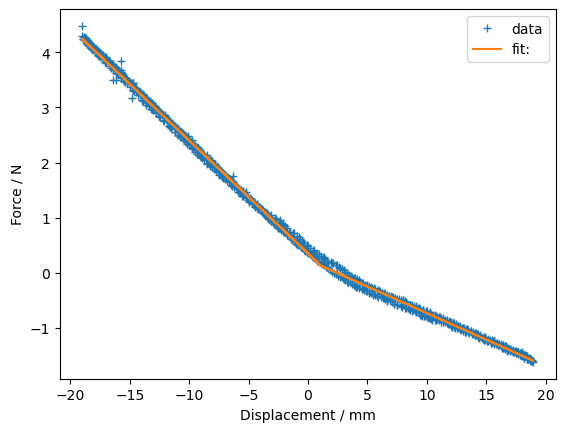

In [11]:
# Plot chosen data and fit results
#pnames = ['Isat', 'Vf', 'Te']
#punits = ['mA', 'V', 'eV']
fig2, ax2 = plt.subplots(1)
ax2.plot(disp, force, '+', label='data')
ax2.plot(disp, fitted_force, label='fit:')
ax2.legend()
ax2.set_xlabel('Displacement / mm')
ax2.set_ylabel('Force / N')
plt.show(block=True)